In [1]:
#import packages
import numpy as np # linear algebra & matrix functions
import pandas as pd # data frames

#for these kaggle notebooks this shows what files are on the machine
import os
print(os.listdir("../input"))

#This data comes from donors choose. it is a set of applications for projects to receive donations

['train.csv', 'resources.csv', 'sample_submission.csv', 'test.csv']


In [2]:
#Read a csv into a pandas data frame. This file has a lot of text in it so it takes a few seconds to read. 
train = pd.read_csv("../input/train.csv")

#See the first 5 rows 
train.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1


In [29]:
#looks like there is a distinct ID for each submission. let's make that column the index of this data frame
train.set_index(['id'], inplace = True)

#get info about the df
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182080 entries, p036502 to p190772
Data columns (total 16 columns):
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null category
school_state                                    182080 non-null category
project_submitted_datetime                      182080 non-null object
project_grade_category                          182080 non-null category
project_subject_categories                      182080 non-null category
project_subject_subcategories                   182080 non-null category
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 6374 non-null object
project_essay_4                                 6374 non-null object
project_resource_summary     

In [4]:
#most of the columns are objects, which is a generic data type and not memory efficient. There are a few ints though so this will show some summary stats:
train.describe()

,teacher_number_of_previously_posted_projects,project_is_approved
count,182080.000000,182080.000000
mean,11.237055,0.847682
std,28.016086,0.359330
min,0.000000,0.000000
25%,0.000000,1.000000
50%,2.000000,1.000000
75%,9.000000,1.000000
max,451.000000,1.000000


In [5]:
# let's look at just a single column. You can call that by 
train.project_is_approved.head()

0    1
1    0
2    1
3    0
4    1
Name: project_is_approved, dtype: int64

In [6]:
#you can also call a single column like this:
train['project_is_approved'].head()

0    1
1    0
2    1
3    0
4    1
Name: project_is_approved, dtype: int64

In [7]:
#the .column_name way is convenient, but it can't be used to assign a new column. for example, you have to do:

#assign like this.........call like this
train['half_approved'] = train.project_is_approved/2

train.half_approved.head()

0    0.5
1    0.0
2    0.5
3    0.0
4    0.5
Name: half_approved, dtype: float64

In [10]:
# you can also use a list of columns in the df[] notation
train[['half_approved', 'project_is_approved']].head()

,half_approved,project_is_approved
0,0.5,1
1,0.0,0
2,0.5,1
3,0.0,0
4,0.5,1


In [30]:
#the half approved column is nonsense so lets just drop it. 
#The axis = 1 means you are dropping a column rather than a row. if you did axis = 0 you would pass an index value rather than a column name
train.drop(['half_approved'], axis = 1, inplace = True)

In [11]:
# in order to clean up the data, group all of the columns by type. Each group is stored in a list
cat_cols = ['teacher_prefix', 'school_state','project_grade_category','project_subject_categories','project_subject_subcategories']
text_cols = ['project_title','project_essay_1','project_essay_2','project_essay_3','project_essay_4', 'project_resource_summary']
num_cols=['teacher_number_of_previously_posted_projects','project_is_approved']

#use the list to view a subset of columns:
train[num_cols].head()

,teacher_number_of_previously_posted_projects,project_is_approved
0,26,1
1,1,0
2,5,1
3,16,0
4,42,1


In [22]:
#you can iterate through lists sequentially using a for loop. You can also start with a blank list and append to it.
new_empty_list = []


#use a for loop to go through each item in the list
for item in num_cols: #you could call 'item' anything, it's just a generic variable
    #take the mean of each column and append it to the new list. 
    new_empty_list.append((round(train[item].mean(),2))) 

#the .format() method is a clean way to insert variables into strings.   
print("the mean for {} is {} and the mean for {} is {}".format(num_cols[0],new_empty_list[0],num_cols[1],new_empty_list[1]))

the mean for teacher_number_of_previously_posted_projects is 11.24 and the mean for project_is_approved is 0.85


In [101]:
#use a list to change the data type of some columns. 
"""
This for loop goes though every column in the categorical list, and takes the unique values in that column,orders them, and saves those to col_cats for each iteration
It stores each of those lists of unique values in another list, cat_list. This is to reference the categories for each column
Lastly, convert the column to a categorical column, also passing through the unique values 
"""
cat_list = []
for col in cat_cols:
    #the .astype(str) converts the values in that columns to strings. you could also do int, float or category.
    col_cats = pd.unique(train[col].astype(str)) 
    cat_list.append(col_cats)
    #converting to categorical this way instead of just doing .astype(category) since we can pass through the unique categories rather than relying on them to be inferred correctly
    train[col] = pd.Categorical(train[col], categories = col_cats)
    
#compare the size of the df here to what it was before. We shaved like 20% of it off by converting to cats.
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182080 entries, p036502 to p190772
Data columns (total 18 columns):
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null category
school_state                                    182080 non-null category
project_submitted_datetime                      182080 non-null datetime64[ns, UTC]
project_grade_category                          182080 non-null category
project_subject_categories                      182080 non-null category
project_subject_subcategories                   182080 non-null category
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 182080 non-null object
project_essay_4                                 182080 non-null object
project_reso

In [92]:
# the column 'project_submitted_datetime' is obviously a date so lets convert it
train['project_submitted_datetime'] = pd.to_datetime(train.project_submitted_datetime, utc=True, format='%Y-%m-%d %H:%M:%S')

#that column is a timestamp, but maybe we are more interested in the month that it was submitted
#sometimes there are functions that work on a single value but not an entire column. 
#you can apply those functions to the whole column by using a for loop to go through every value in the column
#below is the cleanest way of doing that, it's called a list comprehension

train['month_submitted'] = [date.month for date in train.project_submitted_datetime]

#lets make sure it checks out:
train[['project_submitted_datetime','month_submitted']].head()

,project_submitted_datetime,month_submitted
id,,
p036502,2016-11-18 14:45:59+00:00,11
p039565,2017-04-26 15:57:28+00:00,4
p233823,2017-01-01 22:57:44+00:00,1
p185307,2016-08-12 15:42:11+00:00,8
p013780,2016-08-06 09:09:11+00:00,8


In [42]:
# I wonder if the month submitted has any relationship to the acceptance rate
# here we take the mean of the approved column (which amounts to the acceptance rate since it is binary) and group by month_submitted

months = train[['month_submitted','project_is_approved']].groupby(['month_submitted']).mean()
print(months)

                 project_is_approved
month_submitted                     
1                           0.851864
2                           0.861565
3                           0.860227
4                           0.846140
5                           0.866210
6                           0.858690
7                           0.828164
8                           0.842471
9                           0.822424
10                          0.846338
11                          0.864223
12                          0.863149


In [91]:
#ok but that averages over several years. Let's look at the monthly trend over time. 
#We'll need to keep the year in this set, so let's truncate these timestamps to months

train['month_datetime'] = train['project_submitted_datetime'].values.astype('<M8[M]') 

#view the col
train.month_datetime.head()

id
p036502   2016-11-01
p039565   2017-04-01
p233823   2017-01-01
p185307   2016-08-01
p013780   2016-08-01
Name: month_datetime, dtype: datetime64[ns]

In [53]:
#cool, lets make another df with monthly acceptance rates
months_timestamps = train[['month_datetime','project_is_approved']].groupby(['month_datetime']).mean()

#sort the df by the timestamps
months_timestamps.sort_values(['month_datetime'], ascending = True, inplace = True)
months_timestamps.head()

,project_is_approved
month_datetime,
2016-04-01,0.883227
2016-05-01,0.866210
2016-06-01,0.858690
2016-07-01,0.828164
2016-08-01,0.842471


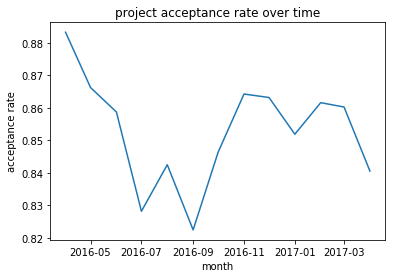

In [59]:
#ok lets see how it looks over time with a graph
import matplotlib.pyplot as plt #graphing package

#lets set our x and y values
x = months_timestamps.index.values # you can call the index like you can call a column name
y = months_timestamps.project_is_approved.values # the .values method takes just the values in the column, and does not carry along any other information

plt.plot(x,y)
plt.xlabel('month')
plt.ylabel('acceptance rate')
plt.title('project acceptance rate over time')
plt.show()

In [60]:
#lets go back to the text columns and covert them to strings
for col in text_cols:
    train[col] = train[col].astype(str)

In [63]:
#you could also do it without a for loop by applying to all cols at once
train[text_cols] = train[text_cols].astype(str)

In [73]:
#ok lets play around with the text a bit. I wonder if essays that talk about tech are more likely to get approved

train['mentioned_tech'] = train['project_essay_1'].str.contains('technology') #returns true if the essay contains the word poverty

#aggregate and group by the new col
train[['mentioned_tech', 'project_is_approved']].groupby(['mentioned_tech']).mean()

,project_is_approved
mentioned_poverty,
False,0.844322
True,0.871360


In [75]:
# there was another CSV included in this set that shows the resources requested

resources = pd.read_csv("../input/resources.csv")
resources.set_index(['id'], inplace = True)
resources.head()


,description,quantity,price
id,,,
p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [94]:
#lets look at the total cost of each project
resources['cost'] = resources.quantity * resources.price

# aggregate to the project level
project_costs = resources[['cost','quantity']].groupby(by = 'id').sum()

project_costs.head()

,cost,quantity
id,,
p000001,833.63,7
p000002,630.28,21
p000003,298.97,4
p000004,1126.22,98
p000005,702.31,8


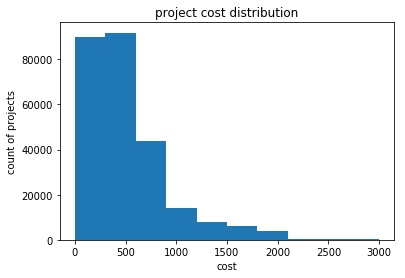

In [95]:
#plot a histogram, but limit the range to remove crazy outliers
plt.hist(project_costs.cost, range = (0,3000)) 
plt.xlabel('cost')
plt.ylabel('count of projects')
plt.title('project cost distribution')
plt.show()

In [97]:
#alright lets look at cost vs. approval rate. we need to join the dfs together

train_cost = train.merge(project_costs, left_on = 'id', right_on = 'id', how = 'left')
train_cost.head(1)

,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,month_submitted,month_datetime,mentioned_poverty,cost,quantity
id,,,,,,,,,,,,,,,,,,,,
p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59+00:00,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,nan,nan,My students need 6 Ipod Nano's to create and d...,26,1,11,2016-11-01,False,899.94,6


In [100]:
#check some summary stats
train_cost[['project_is_approved','cost','quantity']].describe()

,project_is_approved,cost,quantity
count,182080.000000,182080.000000,182080.000000
mean,0.847682,545.748958,16.971447
std,0.359330,548.198713,26.241957
min,0.000000,100.000000,1.000000
25%,1.000000,245.997500,4.000000
50%,1.000000,397.750000,9.000000
75%,1.000000,691.920000,21.000000
max,1.000000,15299.690000,930.000000


In [99]:
#find average costs of approved and not approved
train_cost[['project_is_approved','cost','quantity']].groupby(['project_is_approved']).mean()

,cost,quantity
project_is_approved,,
0,588.449409,20.261592
1,538.076234,16.380250
